# 计算机视觉纳米学位项目

## 实战项目：图像标注

---

Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO)  数据集是用于场景理解的一个大型数据集。 该数据集通常用于训练并对目标检测进行基准测试、分割和标注生成算法。

![Sample Dog Output](images/coco-examples.jpg)

你可以在 [该网站](http://cocodataset.org/#home) 或在 [该研究论文](https://arxiv.org/pdf/1405.0312.pdf)中查阅有关该数据集的更多信息。

在这个 notebook 中，你将要对此数据集进行研究，从而为该实战项目做准备。

## Step 1: 初始化 COCO API

首先，我们要把将用于获取数据的 [COCO API](https://github.com/cocodataset/cocoapi) 初始化。

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.81s)
creating index...
index created!
loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


## Step 2: 绘制样本图像

接下来，我们要从数据集中随机选择一张图像，并为其绘图，以及五个相应的标注。 每次运行下面的代码单元格时，都会选择不同的图像。

在这个项目中，你将使用这个数据集来训练你自己的模型，使其生成图像标注！

ann_id is 1443395
img_id: 112440
img: {'license': 2, 'file_name': 'COCO_val2014_000000112440.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000112440.jpg', 'height': 640, 'width': 426, 'date_captured': '2013-11-18 01:40:54', 'flickr_url': 'http://farm5.staticflickr.com/4062/5150241446_49e2534007_z.jpg', 'id': 112440}
http://images.cocodataset.org/val2014/COCO_val2014_000000112440.jpg


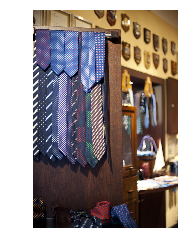

anns: [{'image_id': 112440, 'id': 147325, 'caption': 'Several different ties hand over a tie rack.'}, {'image_id': 112440, 'id': 148231, 'caption': 'A rack of a wide variety and colors of ties.'}, {'image_id': 112440, 'id': 151378, 'caption': 'The tie collection is made up of mostly blue and purple ties.'}, {'image_id': 112440, 'id': 154438, 'caption': 'A tie rack in a room filled with wall plaques.'}, {'image_id': 112440, 'id': 163669, 'caption': 'Many different ties of various colors are hanging in a dressing room.'}]
Several different ties hand over a tie rack.
A rack of a wide variety and colors of ties.
The tie collection is made up of mostly blue and purple ties.
A tie rack in a room filled with wall plaques.
Many different ties of various colors are hanging in a dressing room.


In [9]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
print('ann_id is', ann_id)
img_id = coco.anns[ann_id]['image_id']
print('img_id:',img_id)
img = coco.loadImgs(img_id)[0]
print('img:',img)
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
print('anns:',anns)
coco_caps.showAnns(anns)

## Step 3: 接下来的任务！

在这个项目中，你要使用图像标注对数据集来训练CNN-RNN模型，从而使其自动由标注生成图像。 在接下来的一个 notebook  (**1_Preliminaries-zh.ipynb**) 中，你将了解更多关于如何设计这种架构的内容。

![Image Captioning CNN-RNN model](images/encoder-decoder.png)